In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np


In [2]:
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [3]:
query= '''
select * from `celtic-music-240111.dbt_Celia_Analytics.fb_event_aOS_US_BR_3rddays`
where mp_country="BR"

'''

In [4]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)


0:04:29.155465


In [5]:
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #impor

In [6]:
raw_data.shape

(367025, 117)

##FT

In [7]:
CFt=raw_data[raw_data.y=="Premium"].days_to_take_FT.value_counts() #Ft_Converted


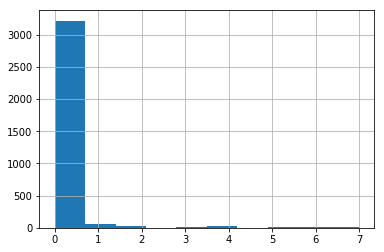

In [8]:
raw_data[raw_data.days_to_take_FT<=7].days_to_take_FT.hist()

In [9]:
didCFt= raw_data[raw_data.y=="Freemium"].days_to_take_FT.value_counts() 
# FT_didn't-Converted
print(didCFt)

0.0      1917
1.0        20
2.0        10
6.0         7
3.0         6
7.0         5
21.0        5
10.0        4
34.0        4
12.0        4
5.0         4
4.0         4
32.0        3
48.0        3
20.0        3
93.0        3
45.0        3
111.0       3
103.0       3
58.0        3
62.0        3
19.0        3
9.0         3
22.0        2
25.0        2
74.0        2
14.0        2
97.0        2
75.0        2
89.0        2
         ... 
114.0       1
54.0        1
164.0       1
57.0        1
154.0       1
202.0       1
209.0       1
36.0        1
99.0        1
107.0       1
98.0        1
18.0        1
11.0        1
222.0       1
134.0       1
46.0        1
217.0       1
94.0        1
152.0       1
219.0       1
100.0       1
16.0        1
113.0       1
61.0        1
56.0        1
172.0       1
90.0        1
169.0       1
192.0       1
79.0        1
Name: days_to_take_FT, Length: 97, dtype: int64


In [10]:
2606/(3077+2606)  #Percentage of people who take Ft and convert

0.45856061939116666

# Days_to_convert

In [11]:
raw_data.y.value_counts()

Freemium    363549
Premium       3476
Name: y, dtype: int64

In [12]:
ConvD=raw_data[raw_data.y=="Premium"].days_to_convert.value_counts() #Converted
print(ConvD)

7.0      934
0.0      421
9.0      212
8.0      202
1.0      125
2.0       77
3.0       68
4.0       55
10.0      51
6.0       49
11.0      45
12.0      43
5.0       35
13.0      35
15.0      30
14.0      25
26.0      24
16.0      21
18.0      20
25.0      19
21.0      19
24.0      18
33.0      16
17.0      16
42.0      15
22.0      15
20.0      14
44.0      14
43.0      13
19.0      13
        ... 
198.0      1
226.0      1
215.0      1
107.0      1
218.0      1
142.0      1
219.0      1
222.0      1
151.0      1
206.0      1
234.0      1
179.0      1
195.0      1
204.0      1
187.0      1
188.0      1
220.0      1
180.0      1
160.0      1
231.0      1
189.0      1
177.0      1
191.0      1
136.0      1
171.0      1
232.0      1
168.0      1
224.0      1
205.0      1
227.0      1
Name: days_to_convert, Length: 215, dtype: int64


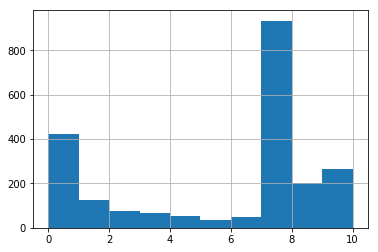

In [13]:
raw_data[raw_data.days_to_convert<=10].days_to_convert.hist()

In [14]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [15]:
gf=raw_data[columns]

In [16]:
print(gf['y'].value_counts())
Premium_count = len(gf[gf['y']=="Premium"])
Freemium_count  = len(gf[gf['y']=="Freemium"])
pct_of_Premium = Premium_count/(Premium_count+Freemium_count)
print("Percentage of Premium", pct_of_Premium*100)
pct_of_Freemium= Freemium_count/(Premium_count+Freemium_count)
print("Percentage of Freemium", pct_of_Freemium *100)

Freemium    363549
Premium       3476
Name: y, dtype: int64
Percentage of Premium 0.9470744499693481
Percentage of Freemium 99.05292555003065


In [17]:
p_mean= gf.groupby('y').mean().T

In [18]:
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()


In [19]:
p_mean['Freemium'].values

array([5.46716413e+06, 5.04341671e+00, 1.59764101e+03, 8.63586240e+02,
       8.74773414e-01, 5.82865033e-03, 7.54368737e-02, 2.79333185e+00,
       1.00756707e-02, 5.43844159e-01, 2.13936773e+00, 2.30172549e-01,
       9.39358931e-01, 1.03809940e-02, 1.11401764e-03, 1.00319627e+00,
       1.00130106e+00, 1.16241277e+00, 1.34342276e-02, 9.56624829e-02,
       3.25598475e-01, 7.15171820e-05, 4.95118952e-05, 5.47615315e-01,
       8.52526069e-01, 1.60907883e+00, 1.46194873e-01, 6.92874963e-01,
       3.54871008e-01, 1.52205067e-01, 3.23559135e+00, 2.30574145e-01,
       2.31828447e-01, 7.23973935e-02, 1.04890950e-01, 8.73169779e-02,
       7.78106940e-02, 1.32581578e+00, 1.20533958e-02, 5.17949437e-03,
       9.61851085e-02, 8.06529519e-01, 2.53682447e-01, 2.94150170e-01,
       1.22811505e-01, 9.87487244e-04, 8.37257151e-01, 6.29351202e-03,
       7.06369705e-03, 3.82451884e-02, 3.76565470e-03, 1.07299979e+00,
       1.53046769e-02, 6.01404487e-01, 5.41605121e-03, 2.77816745e-04,
      

In [20]:
p_mean['Premium'].values

array([5.45645150e+06, 6.99312929e+00, 1.82077388e+03, 9.71621692e+02,
       9.90794016e-01, 4.60586881e-01, 5.36823936e-01, 5.74798619e+00,
       4.11392405e-02, 1.04746835e+00, 2.10644419e+00, 1.29459148e-01,
       9.17721519e-01, 1.43843498e-02, 1.72612198e-03, 1.01006904e+00,
       1.00834292e+00, 1.23216341e+00, 1.89873418e-02, 1.43555811e-01,
       2.48849252e-01, 2.87686997e-04, 2.87686997e-04, 1.52301496e+00,
       9.95109321e-01, 1.75345224e+00, 1.09896433e-01, 8.74856157e-01,
       4.17721519e-01, 1.53049482e-01, 6.04574223e+00, 5.77963176e-01,
       6.61680092e-01, 8.14154200e-02, 1.85270426e-01, 1.55063291e-01,
       1.19965478e-01, 2.07796318e+00, 1.89010357e-01, 4.70655926e-01,
       1.09953970e+00, 5.02589183e+00, 9.36708861e-01, 1.38924051e+00,
       1.02387802e+00, 7.76754891e-03, 5.52733026e+00, 2.87686997e-02,
       6.38665132e-02, 3.46375144e-01, 3.07825086e-02, 1.72266974e+00,
       6.01265823e-02, 4.32077100e+00, 3.95569620e-01, 2.70425777e-02,
      

In [21]:
p_mean.index

Index(['user_id', 'days_to_take_FT', 'screen_height', 'screenwidth',
       'initial_assessment_completed', 'FT_start', 'Video_Completed',
       'OpenApp', 'S_DAPNewSkills', 'AB_TEST', 'S_SPHome', 'S_SPLogin',
       'LogIn', 'SPForgotPass', 'S_SPSignup', 'SignUp', 'OBCreateUser',
       'S_OBBabyName', 'OBCreateTwins', 'S_OBPremature', 'Paywall_Dismiss',
       'S_InviteReceived', 'InviteReceived', 'S_Paywall_Soft', 'CreateBaby',
       'S_IAIntro', 'IAStraightToActivities', 'IAStartAssessment',
       'IASkipAssessment', 'MasterSkill', 'IAFinishSkill', 'S_HealthInterest',
       'IAFinishAssessment', 'S_IASetReminder', 'S_IAReminderSet',
       'S_IAReminderContinue', 'IAReminder', 'S_IA_Answer_Skill',
       'DAPChangeActivity', 'S_DAPPastPlansPremium', 'DAPActivityCompleted',
       'DAPFullScreenActivity', 'S_DAPMaterials', 'MilestonesUpdate',
       'ArticleView', 'SlideshowView', 'ActivityView', 'ClickInDAP',
       'RateActivityDAP', 'Feedback_RateActivity',
       'Dismiss_Fe

In [22]:
numerics=list(p_mean.index)
numerics

['user_id',
 'days_to_take_FT',
 'screen_height',
 'screenwidth',
 'initial_assessment_completed',
 'FT_start',
 'Video_Completed',
 'OpenApp',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'S_SPSignup',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_InviteReceived',
 'InviteReceived',
 'S_Paywall_Soft',
 'CreateBaby',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'IAFinishAssessment',
 'S_IASetReminder',
 'S_IAReminderSet',
 'S_IAReminderContinue',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'DAPFullScreenActivity',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'Vid

# Correlations



In [23]:
numerics.append('y')

In [24]:
numerics= raw_data[numerics]

In [25]:
cleanup_nums = {"y":{'Premium':1, 'Freemium':0}}

In [26]:
numerics.replace(cleanup_nums, inplace=True)

In [34]:
correlation = numerics.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [35]:
correlation=correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool)) # convert lower triangle of values to NaNs

In [36]:
correlations= correlation.stack().reset_index()
correlations.columns=['V1','V2','Corr']



In [37]:
correlations.loc[correlations['Corr']>.70].reset_index() #variables to remove given the positive correlation to avoid collinearity



index                            V1                    V2      Corr
0     175                 screen_height           screenwidth  0.955920
1     369  initial_assessment_completed            CreateBaby  0.826940
2     484                      FT_start        FreeTrialStart  0.939095
3    1676              S_InviteReceived        InviteReceived  0.916695
4    2321              S_HealthInterest    IAFinishAssessment  0.783418
5    2495               S_IAReminderSet  S_IAReminderContinue  0.791305
6    2496               S_IAReminderSet            IAReminder  0.924921
7    2551          S_IAReminderContinue            IAReminder  0.790662
8    2870         DAPFullScreenActivity          ActivityView  0.980377
9    3599              S_MenuFamilyHome        S_MenuEditBaby  0.772593
10   3957                    S_CATSkill      S_CollectionView  0.970944

In [38]:
correlations.loc[correlations['Corr']<-.70].reset_index() #variables to remove given the negative correlation to avoid collinearity



Empty DataFrame
Columns: [index, V1, V2, Corr]
Index: []

In [39]:
to_keep = list(numerics.columns)
not_keep=['screen_height','CreateBaby','FreeTrialStart','IAFinishAssessment','S_IAReminderContinue','S_IAReminderSet','DAPFullScreenActivity','S_MenuEditBaby','S_CATSkill']
for element in not_keep:
    if element in to_keep:
        to_keep.remove(element)
to_keep

['user_id',
 'days_to_take_FT',
 'screenwidth',
 'initial_assessment_completed',
 'FT_start',
 'Video_Completed',
 'OpenApp',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'S_SPSignup',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_InviteReceived',
 'InviteReceived',
 'S_Paywall_Soft',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'S_IASetReminder',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'NPSSubmit',
 'S_NPSScore',
 'S_ProgressHome',
 'OverTime',
 'S_MenuFamilyHome',
 'MenuHelp',
 'MenuMemberS

In [40]:
to_= ['user_id',
 'days_to_take_FT',
 'screenwidth',
 'initial_assessment_completed',
 'FT_start',
 'Video_Completed',
 'OpenApp',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'S_SPSignup',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'S_IASetReminder',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'NPSSubmit',
 'S_NPSScore',
 'S_ProgressHome',
 'OverTime',
 'S_MenuFamilyHome',
 'MenuHelp',
 'MenuMemberStats',
 'MenuFamilyInvite',
 'MenuChangeBirthday',
 'S_MenuUserProfile',
 'MenuFamilyDefault',
 'DailyReminders',
 'S_MenuFamilyProfile',
 'TAPCallToAction',
 'S_PremiumProcess',
 'RestorePurchase',
 'S_CATHome_P',
 'S_CATHome_F',
 'CATSearch',
 'S_CATViewSkill',
 'S_CollectionView',
 'ViewAllCollections',
 'S_SearchEmptyState',
 'ResetSearch',
 'S_MilestonesHome',
 'SkillsViewAllSkills',
 'S_PromoCode',
 'PromoCodeRedeem',
 'S_FeedHome',
 'InviteClassrooms',
 'shown',
 'clicked',
 'dismissed',
 'y']